In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
pd.set_option("display.max.columns", None)

In [2]:
auto = pd.read_csv("cleanedauto.csv")

In [3]:
auto.head(3)

,make_model,body_type,price,vat,km,registration,Previous Owners,Next Inspection,Inspection new,Make,Model,First Registration,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country)
0,Audi A1,Sedans,15770,VAT deductible,56013.0,2016-01-01,2.0,2021-06-01,1,Audi,A1,2016.0,Black,Metallic,"Cloth, Black",5.0,5.0,Automatic,3.0,front,Diesel,Euro 6,NaN,NaN,NaN,66.0,Used,NaN,1422.0,99.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.8,4.3,3.5
1,Audi A1,Sedans,14500,Price negotiable,80000.0,2017-03-01,NaN,NaN,0,Audi,A1,2017.0,Red,NaN,"Cloth, Grey",3.0,4.0,Automatic,4.0,front,Gasoline,Euro 6,4.0,7.0,NaN,141.0,Used,NaN,1798.0,129.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",5.6,7.1,4.7
2,Audi A1,Sedans,14640,VAT deductible,83450.0,2016-02-01,1.0,NaN,0,Audi,A1,2016.0,Black,Metallic,"Cloth, Black",4.0,4.0,Automatic,NaN,front,Diesel,Euro 6,4.0,NaN,NaN,85.0,Used,NaN,1598.0,99.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.8,4.4,3.4


There are columns that have missing values. I created two functions. <b>"fill_w_onecol"</b> function will fill missing values based on one column and <b>"fill_w_twocol"</b> function will fill missing values based on two given columns.

In [4]:
def fill_w_onecol(df, missing, col1):
    for i in df[col1].value_counts().index:
        try:
            val = df[df[col1]==i][missing].mode()[0]
            df.loc[df[col1]==i,missing] = df.loc[df[col1]==i,missing].fillna(val)
        except (IndexError, KeyError):
            val = df[missing].mode()[0]
            df.loc[df[col1]==i,missing] = df.loc[df[col1]==i,missing].fillna(val)

In [5]:
def fill_w_twocol(df, missing, col1, col2):
    for i in df[col1].value_counts().index:
        try:
            for j in df[col2].value_counts(dropna=False).index:
                if j in df[col2].value_counts().index:
                    condition = (df[col1]==i) & (df[col2]==j)
                    val = df[condition][missing].mode()[0]
                    df.loc[condition,missing] = df.loc[condition,missing].fillna(val)
                else:
                    val = df[df[col1]==i][missing].mode()[0]
                    df.loc[df[col1]==i,missing] = df.loc[df[col1]==i,missing].fillna(val)          
        except (IndexError, KeyError):
            val = df[df[col1]==i][missing].mode()[0]
            df.loc[df[col1]==i,missing] = df.loc[df[col1]==i,missing].fillna(val)

#### Body Type

In [6]:
auto["body_type"].value_counts(dropna=False)

Sedans           7902
Station wagon    3552
Compact          3152
Van               783
Other             289
Transporter        88
NaN                60
Off-Road           55
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [7]:
auto.replace({"body_type":{"Other":np.nan}}, inplace=True)

In [8]:
auto["body_type"].value_counts(dropna=False)

Sedans           7902
Station wagon    3552
Compact          3152
Van               783
NaN               349
Transporter        88
Off-Road           55
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [9]:
fill_w_twocol(auto, "body_type", "make_model", "First Registration")

In [10]:
auto["body_type"].isnull().sum()

0

#### Price

In [11]:
auto["price"].sort_values()

8824      4950
8822      4990
8823      5250
8821      5300
13765     5445
         ...  
15823    64332
3586     64900
3648     67600
15821    68320
3647     74600
Name: price, Length: 15914, dtype: int64

#### Vat

In [12]:
auto["vat"].value_counts(dropna=False)

VAT deductible      10979
NaN                  4509
Price negotiable      426
Name: vat, dtype: int64

In [13]:
auto["vat"].interpolate(method="pad", inplace=True)

In [14]:
auto["vat"].value_counts(dropna=False)

VAT deductible      15043
Price negotiable      871
Name: vat, dtype: int64

#### km

In [15]:
auto["km"].value_counts(dropna=False)

10.0       1044
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
79930.0       1
267.0         1
8329.0        1
1060.0        1
49320.0       1
Name: km, Length: 6688, dtype: int64

In [16]:
auto["register_age"] = 2020 - auto["First Registration"]

In [17]:
auto["register_age"].value_counts(dropna=False)

2.0    4519
4.0    3674
3.0    3273
1.0    2851
NaN    1597
Name: register_age, dtype: int64

In [18]:
fill_w_twocol(auto,"register_age","make_model","km")

In [19]:
auto["register_age"].value_counts(dropna=False)

2.0    5495
4.0    3908
3.0    3273
1.0    3238
Name: register_age, dtype: int64

There are rows that both Register Age and Km columns are consists of missing values. This can effect our result. They are removed.

In [20]:
col = auto[auto["register_age"].isnull() & auto["km"].isnull()].index

In [21]:
auto.drop(col, inplace=True)

In [22]:
auto.shape

(15914, 38)

In [23]:
auto["km"].isnull().sum()

1024

In [24]:
auto.groupby("register_age")["km"].transform("median")

0        71174.0
1        34752.0
2        71174.0
3        71174.0
4        71174.0
          ...   
15909    71174.0
15910       19.0
15911       19.0
15912       19.0
15913       19.0
Name: km, Length: 15914, dtype: float64

In [25]:
auto["km"].fillna(auto.groupby("register_age")["km"].transform("median"), inplace=True)

In [26]:
auto["km"].isnull().sum()

0

#### Registration and First Registration are indicating the same values. Before we created Register Age. We don't need them anymore.

In [27]:
auto.drop(["First Registration","registration"], axis=1, inplace=True)

In [28]:
auto.shape

(15914, 36)

#### Previous Owner

In [29]:
auto["Previous Owners"].value_counts(dropna=False)

1.0    8293
NaN    6636
2.0     778
0.0     188
3.0      17
4.0       2
Name: Previous Owners, dtype: int64

In [30]:
auto["Previous Owners"].fillna(method="ffill",inplace=True)

In [31]:
auto["Previous Owners"].value_counts(dropna=False)

1.0    14188
2.0     1177
0.0      520
3.0       27
4.0        2
Name: Previous Owners, dtype: int64

#### Next Inspection

In [32]:
auto["Next Inspection"].value_counts(dropna=False)

NaN           12380
2021-06-01      471
2021-03-01      210
2021-05-01      180
2021-04-01      171
              ...  
1955-01-01        1
2024-03-01        1
2017-02-01        1
2018-01-01        1
2017-05-01        1
Name: Next Inspection, Length: 78, dtype: int64

Next Inspection column has many missing values. It can effect our solution. It is removed.

In [33]:
auto.drop("Next Inspection", axis=1, inplace=True)

#### Inspection New

In [34]:
auto["Inspection new"].value_counts()

0    11982
1     3932
Name: Inspection new, dtype: int64

#### Make and Model columns used as make_model column. They are removed.

In [35]:
auto.drop(["Make", "Model"], axis=1, inplace=True)

In [36]:
auto["Body Color"].value_counts(dropna=False)

Black     3745
Grey      3503
White     3405
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Name: Body Color, dtype: int64

In [37]:
fill_w_twocol(auto, "Body Color", "make_model", "register_age")

In [38]:
auto["Body Color"].value_counts(dropna=False)

Grey      3900
Black     3899
White     3444
Silver    1650
Blue      1435
Red        957
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Name: Body Color, dtype: int64

#### Paint Type

In [39]:
auto["Paint Type"].value_counts(dropna=False)

Metallic       9792
NaN            5769
Uni/basic       347
Perl effect       6
Name: Paint Type, dtype: int64

In [40]:
fill_w_twocol(auto, "Paint Type", "make_model", "register_age")

In [41]:
auto["Paint Type"].value_counts(dropna=False)

Metallic       15544
Uni/basic        364
Perl effect        6
Name: Paint Type, dtype: int64

#### Upholstery

In [42]:
auto["Upholstery"].value_counts(dropna=False)

Cloth, Black           5818
NaN                    3718
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Full leather, Brown     116
Part leather, Grey      116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Velour, Black            36
Full leather, Beige      36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Cloth, Blue              12
Brown                    12
Velour, Grey              8
Cloth, White              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige               

In [43]:
auto.loc[auto["Upholstery"].notnull(),"Upholstery"] = auto.loc[auto["Upholstery"].notnull(),"Upholstery"].apply(lambda x:"Part/Full Leather" if ("leather" or "alcantara") in x.lower() else x)

In [44]:
condition = (auto["Upholstery"]!="Part/Full Leather") & (auto["Upholstery"].notnull())

In [45]:
auto.loc[condition, "Upholstery"] = "Cloth"

In [46]:
auto["Upholstery"].value_counts(dropna=False)

Cloth                9688
NaN                  3718
Part/Full Leather    2508
Name: Upholstery, dtype: int64

In [47]:
fill_w_twocol(auto, "Upholstery", "make_model", "register_age")

In [48]:
auto["Upholstery"].value_counts(dropna=False)

Cloth                13052
Part/Full Leather     2862
Name: Upholstery, dtype: int64

#### Number of Doors

In [49]:
auto["Nr. of Doors"].value_counts(dropna=False)

5.0    11571
4.0     3079
3.0      831
2.0      219
NaN      212
7.0        1
1.0        1
Name: Nr. of Doors, dtype: int64

In [50]:
auto.loc[auto["Nr. of Doors"]==1, "Nr. of Doors"] = 5

In [51]:
auto[auto["Nr. of Doors"]==7]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
15197,Renault Espace,Van,21600,Price negotiable,78000.0,1.0,0,Brown,Metallic,Part/Full Leather,7.0,NaN,Automatic,4.0,front,Diesel,Euro 6,NaN,6.0,NaN,118.0,Used,NaN,1598.0,120.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",4.6,5.0,4.4,4.0


In [52]:
auto.loc[auto["Nr. of Doors"]==7, "Nr. of Doors"] = 5

In [53]:
fill_w_twocol(auto, "Nr. of Doors", "make_model", "register_age")

In [54]:
auto["Nr. of Doors"].value_counts(dropna=False)

5.0    11785
4.0     3079
3.0      831
2.0      219
Name: Nr. of Doors, dtype: int64

#### Number of Seats

In [55]:
auto["Nr. of Seats"].value_counts()

5.0    13331
4.0     1125
7.0      362
2.0      116
6.0        2
3.0        1
Name: Nr. of Seats, dtype: int64

In [56]:
auto[auto["Nr. of Seats"]==3]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
1636,Audi A1,Compact,23090,VAT deductible,9821.0,1.0,1,Black,Metallic,Part/Full Leather,2.0,3.0,Automatic,4.0,front,Gasoline,Euro 6,NaN,7.0,Germany,141.0,Used,NaN,1798.0,134.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",5.8,7.4,4.9,2.0


In [57]:
auto.loc[auto["Nr. of Seats"]==3, "Nr. of Seats"] = 5

In [58]:
auto[auto["Nr. of Seats"]==6]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
582,Audi A1,Compact,13500,VAT deductible,100000.0,1.0,0,White,Metallic,Cloth,5.0,6.0,Manual,4.0,NaN,Gasoline,Euro 6,NaN,5.0,NaN,70.0,Used,12.0,1000.0,NaN,Air conditioning,On-board computer,Alloy wheels,ABS,NaN,NaN,NaN,3.0
15885,Renault Espace,Station wagon,42490,VAT deductible,71174.0,1.0,0,Black,Metallic,Cloth,5.0,6.0,Automatic,4.0,front,Diesel,Euro 6,4.0,6.0,Germany,147.0,New,NaN,1997.0,168.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",5.7,6.1,5.3,4.0


In [59]:
auto.loc[auto["Nr. of Seats"]==6, "Nr. of Seats"] = 5

In [60]:
auto["Nr. of Seats"].value_counts(dropna=False)

5.0    13334
4.0     1125
NaN      977
7.0      362
2.0      116
Name: Nr. of Seats, dtype: int64

In [61]:
fill_w_twocol(auto, "Nr. of Seats", "make_model", "register_age")

In [62]:
auto["Nr. of Seats"].value_counts(dropna=False)

5.0    14235
4.0     1173
7.0      390
2.0      116
Name: Nr. of Seats, dtype: int64

In [63]:
auto[auto["Nr. of Seats"]==2]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
8676,Opel Corsa,Transporter,7450,VAT deductible,97000.0,1.0,0,Blue,Metallic,Cloth,3.0,2.0,Manual,3.0,front,Diesel,NaN,NaN,5.0,Belgium,63.0,Used,NaN,1300.0,NaN,"Air conditioning,Electrical side mirrors,Navig...","On-board computer,Radio","Alloy wheels,Catalytic Converter","ABS,Central door lock with remote control,Dayt...",NaN,NaN,NaN,3.0
8704,Opel Corsa,Coupe,7200,VAT deductible,70296.0,1.0,0,White,Metallic,Cloth,3.0,2.0,Manual,4.0,front,Diesel,Euro 6,NaN,5.0,NaN,55.0,Used,NaN,1248.0,99.0,"Electrical side mirrors,Power windows,Start-st...",NaN,NaN,"ABS,Central door lock,Driver-side airbag,Elect...",3.7,4.5,3.3,4.0
8818,Opel Corsa,Transporter,5600,VAT deductible,112413.0,1.0,0,White,Metallic,Cloth,3.0,2.0,Manual,4.0,front,Diesel,Euro 6,NaN,5.0,Italy,55.0,Used,12.0,1248.0,101.0,"Air conditioning,Power windows",NaN,NaN,"ABS,Central door lock,Driver-side airbag,Elect...",3.8,4.6,3.3,4.0
8820,Opel Corsa,Transporter,5450,VAT deductible,73000.0,1.0,0,White,Metallic,Cloth,3.0,2.0,Manual,4.0,front,Diesel,Euro 6,NaN,5.0,Spain,55.0,Used,12.0,1248.0,100.0,"Air conditioning,Electrical side mirrors,Multi...","Bluetooth,Radio,USB",NaN,"ABS,Central door lock,Central door lock with r...",3.8,4.5,3.3,4.0
8823,Opel Corsa,Transporter,5250,VAT deductible,80000.0,1.0,0,White,Metallic,Cloth,3.0,2.0,Manual,4.0,front,Diesel,Euro 6,NaN,5.0,Spain,55.0,Used,12.0,1248.0,100.0,"Air conditioning,Electrical side mirrors,Multi...","Bluetooth,Radio,USB",NaN,"ABS,Central door lock,Central door lock with r...",3.8,4.5,3.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14550,Renault Clio,Sedans,10500,Price negotiable,30000.0,1.0,0,White,Metallic,Cloth,5.0,2.0,Manual,4.0,NaN,Diesel,Euro 6,NaN,5.0,NaN,55.0,Used,NaN,1461.0,85.0,Air conditioning,On-board computer,NaN,"ABS,Alarm system,Central door lock,Driver-side...",3.3,3.5,3.1,2.0
14554,Renault Clio,Sedans,10500,Price negotiable,14000.0,1.0,0,Black,Metallic,Cloth,5.0,2.0,Manual,4.0,NaN,Diesel,Euro 6,NaN,5.0,NaN,66.0,Used,NaN,1461.0,85.0,Air conditioning,On-board computer,NaN,"ABS,Alarm system,Central door lock,Driver-side...",3.3,3.5,3.1,2.0
14574,Renault Clio,Sedans,10300,VAT deductible,16900.0,1.0,0,Black,Metallic,Cloth,5.0,2.0,Manual,4.0,front,Diesel,Euro 6,NaN,5.0,NaN,55.0,Pre-registered,NaN,1461.0,108.0,"Cruise control,Electrical side mirrors,Power w...","On-board computer,Radio",NaN,"ABS,Central door lock,Driver-side airbag,Elect...",4.2,4.5,3.8,2.0
14583,Renault Clio,Transporter,10460,VAT deductible,99.0,2.0,1,White,Metallic,Cloth,5.0,2.0,Manual,4.0,front,Gasoline,Euro 6,NaN,5.0,Germany,54.0,Pre-registered,24.0,1149.0,128.0,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.6,7.2,4.7,1.0


In [64]:
auto.loc[auto["Nr. of Seats"]==2, "Nr. of Seats"] = np.nan

In [65]:
fill_w_twocol(auto, "Nr. of Seats", "make_model", "Nr. of Doors")

In [66]:
auto["Nr. of Seats"].value_counts(dropna=False)

5.0    14351
4.0     1173
7.0      390
Name: Nr. of Seats, dtype: int64

#### Gearing Type

In [67]:
auto["Gearing Type"].value_counts(dropna=False)

Manual            8148
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

#### Cylinders

In [68]:
auto["Cylinders"].value_counts(dropna=False)

4.0    8103
NaN    5679
3.0    2102
5.0      22
6.0       3
2.0       2
8.0       2
1.0       1
Name: Cylinders, dtype: int64

In [69]:
auto[auto["Cylinders"]==6]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
10766,Opel Insignia,Station wagon,12000,Price negotiable,185000.0,1.0,0,White,Metallic,Cloth,5.0,5.0,Automatic,6.0,NaN,Diesel,Euro 4,NaN,6.0,NaN,100.0,Used,NaN,2967.0,39.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Roof rack,Ski...","ABS,Adaptive Cruise Control,Adaptive headlight...",9.1,11.3,7.8,4.0
10821,Opel Insignia,Station wagon,12500,Price negotiable,77500.0,1.0,0,Grey,Metallic,Cloth,5.0,5.0,Automatic,6.0,front,Diesel,Euro 6,4.0,7.0,NaN,100.0,Used,NaN,1598.0,129.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Touch screen,Voice Control","ABS,Adaptive Cruise Control,Central door lock,...",5.4,7.4,5.1,3.0
12892,Opel Insignia,Sedans,26500,VAT deductible,5.0,1.0,0,Grey,Uni/basic,Part/Full Leather,5.0,5.0,Manual,6.0,NaN,Diesel,NaN,NaN,6.0,NaN,100.0,Used,12.0,1600.0,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",NaN,NaN,NaN,1.0


In [70]:
auto.loc[auto["Cylinders"]==6, "Cylinders"] = 4

In [71]:
auto[auto["Cylinders"]==2]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
11337,Opel Insignia,Station wagon,21900,VAT deductible,13600.0,1.0,0,Grey,Metallic,Part/Full Leather,5.0,5.0,Automatic,2.0,front,Diesel,NaN,NaN,6.0,Italy,100.0,Employee's car,NaN,NaN,NaN,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Touch screen,...","ABS,Central door lock with remote control,Driv...",NaN,NaN,NaN,2.0
15830,Renault Espace,Van,47590,VAT deductible,6000.0,1.0,0,Black,Metallic,Part/Full Leather,5.0,7.0,Automatic,2.0,front,Diesel,Euro 6,4.0,6.0,Germany,147.0,Employee's car,NaN,1997.0,139.0,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Hands-free equipment,On-board comput...",Voice Control,"ABS,Alarm system,Blind spot monitor,Central do...",5.3,6.2,4.7,1.0


In [72]:
auto.loc[auto["Cylinders"]==2, "Cylinders"] = 4

In [73]:
auto[auto["Cylinders"]==8]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
535,Audi A1,Compact,12990,VAT deductible,41200.0,1.0,1,Silver,Metallic,Cloth,5.0,4.0,Manual,8.0,front,Gasoline,Euro 4,NaN,NaN,NaN,70.0,Used,NaN,999.0,331.0,"Air conditioning,Automatic climate control,Ele...",NaN,"Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",13.8,19.9,10.3,4.0
15050,Renault Espace,Van,24990,VAT deductible,47423.0,1.0,0,Black,Metallic,Part/Full Leather,5.0,5.0,Automatic,8.0,NaN,Diesel,NaN,NaN,NaN,NaN,117.0,Used,3.0,NaN,NaN,Park Distance Control,NaN,Alloy wheels,NaN,NaN,NaN,NaN,3.0


In [74]:
auto.loc[(auto["Cylinders"]==8) & (auto["make_model"]=="Audi A1"), "Cylinders"] = 3

In [75]:
auto.loc[(auto["Cylinders"]==8) & (auto["make_model"]=="Renault Espace"), "Cylinders"] = 4

In [76]:
auto[auto["Cylinders"]==1]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
9951,Opel Corsa,Compact,16625,VAT deductible,100.0,1.0,0,Black,Metallic,Cloth,3.0,5.0,Automatic,1.0,front,Gasoline,Euro 6,NaN,6.0,Germany,66.0,Pre-registered,NaN,1398.0,140.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Sport suspension","ABS,Central door lock,Daytime running lights,D...",6.0,7.8,4.9,1.0


In [77]:
auto.loc[auto["Cylinders"]==1, "Cylinders"] = 3

In [78]:
auto["Cylinders"].value_counts(dropna=False)

4.0    8109
NaN    5679
3.0    2104
5.0      22
Name: Cylinders, dtype: int64

In [79]:
fill_w_twocol(auto, "Cylinders", "make_model", "register_age")

In [80]:
auto["Cylinders"].value_counts(dropna=False)

4.0    12735
3.0     3157
5.0       22
Name: Cylinders, dtype: int64

#### Drive Chain

In [81]:
auto["Drive chain"].value_counts(dropna=False)

front    8885
NaN      6854
4WD       171
rear        4
Name: Drive chain, dtype: int64

In [82]:
auto["Drive chain"].fillna(method="ffill", inplace=True)

In [83]:
auto["Drive chain"].value_counts(dropna=False)

front    15574
4WD        335
rear         5
Name: Drive chain, dtype: int64

#### Fuel

In [84]:
auto["Fuel"].value_counts(dropna=False)

Gasoline    8554
Diesel      7298
LPG/CNG       62
Name: Fuel, dtype: int64

#### Emission Class

In [85]:
auto["Emission Class"].value_counts(dropna=False)

Euro 6    12169
NaN        3627
Euro 5       78
Euro 4       40
Name: Emission Class, dtype: int64

In [86]:
fill_w_twocol(auto, "Emission Class", "make_model", "register_age")

In [87]:
auto["Emission Class"].value_counts(dropna=False)

Euro 6    15794
Euro 5       78
Euro 4       42
Name: Emission Class, dtype: int64

#### Emission Label

In [88]:
auto["Emission Label"].value_counts(dropna=False)

NaN    11970
4.0     3552
1.0      381
5.0        8
3.0        2
2.0        1
Name: Emission Label, dtype: int64

In [89]:
fill_w_onecol(auto, "Emission Label", "Emission Class")

In [90]:
auto["Emission Label"].value_counts(dropna=False)

4.0    15522
1.0      381
5.0        8
3.0        2
2.0        1
Name: Emission Label, dtype: int64

#### Gears

In [91]:
auto["Gears"].value_counts()

6.0     5819
5.0     3238
7.0     1908
8.0      224
9.0        6
4.0        2
3.0        2
1.0        2
50.0       1
2.0        1
Name: Gears, dtype: int64

In [92]:
auto[auto["Gears"]==9]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
15807,Renault Espace,Van,54982,VAT deductible,11.0,1.0,0,White,Metallic,Part/Full Leather,5.0,5.0,Automatic,4.0,4WD,Gasoline,Euro 6,4.0,9.0,Netherlands,165.0,New,NaN,1798.0,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",7.6,9.9,6.4,1.0
15809,Renault Espace,Van,54982,VAT deductible,11.0,1.0,0,White,Metallic,Part/Full Leather,5.0,5.0,Automatic,4.0,4WD,Gasoline,Euro 6,4.0,9.0,Netherlands,165.0,New,NaN,1798.0,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",7.6,9.9,6.4,1.0
15819,Renault Espace,Van,52711,VAT deductible,11.0,1.0,0,Grey,Metallic,Part/Full Leather,5.0,5.0,Automatic,4.0,front,Gasoline,Euro 6,4.0,9.0,Netherlands,165.0,New,NaN,1798.0,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",7.4,9.2,6.3,1.0
15822,Renault Espace,Van,52711,VAT deductible,11.0,1.0,0,Grey,Metallic,Part/Full Leather,5.0,5.0,Automatic,4.0,front,Gasoline,Euro 6,4.0,9.0,Netherlands,165.0,New,NaN,1798.0,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",7.4,9.2,6.3,1.0
15864,Renault Espace,Van,49100,VAT deductible,11.0,1.0,0,White,Metallic,Part/Full Leather,5.0,5.0,Automatic,4.0,front,Diesel,Euro 6,4.0,9.0,Netherlands,146.0,New,NaN,1997.0,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",5.3,6.2,4.7,1.0
15871,Renault Espace,Van,48765,VAT deductible,11.0,1.0,0,White,Metallic,Part/Full Leather,5.0,5.0,Automatic,4.0,4WD,Gasoline,Euro 6,4.0,9.0,Netherlands,165.0,New,NaN,1798.0,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",7.4,9.2,6.3,1.0


In [93]:
auto.loc[auto["Gears"]==9, "Gears"] = 7

In [94]:
auto[auto["Gears"]==4]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
15817,Renault Espace,Van,50950,VAT deductible,11.0,1.0,0,Grey,Metallic,Cloth,5.0,5.0,Automatic,4.0,front,Gasoline,Euro 6,4.0,4.0,Netherlands,165.0,New,NaN,1798.0,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",7.6,9.9,6.4,1.0
15818,Renault Espace,Van,50950,VAT deductible,11.0,1.0,0,Grey,Metallic,Cloth,5.0,5.0,Automatic,4.0,front,Gasoline,Euro 6,4.0,4.0,Netherlands,165.0,New,NaN,1798.0,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",7.6,9.9,6.4,1.0


In [95]:
auto.loc[auto["Gears"]==4, "Gears"] = 7

In [96]:
auto[auto["Gears"]==3]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
15812,Renault Espace,Van,54204,VAT deductible,11.0,1.0,0,White,Metallic,Part/Full Leather,5.0,5.0,Automatic,4.0,4WD,Diesel,Euro 6,4.0,3.0,Netherlands,146.0,New,NaN,1997.0,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",5.4,6.3,4.9,1.0
15840,Renault Espace,Van,46660,VAT deductible,11.0,1.0,0,White,Metallic,Part/Full Leather,5.0,5.0,Automatic,4.0,4WD,Diesel,Euro 6,4.0,3.0,Netherlands,118.0,New,NaN,1997.0,NaN,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",5.1,5.7,4.8,1.0


In [97]:
auto.loc[auto["Gears"]==3, "Gears"] = 7

In [98]:
auto[auto["Gears"]==2]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
9807,Opel Corsa,Sedans,9880,VAT deductible,19247.0,1.0,0,Grey,Metallic,Cloth,5.0,5.0,Manual,4.0,front,Gasoline,Euro 6,4.0,2.0,NaN,51.0,Used,12.0,1229.0,NaN,"Air conditioning,Light sensor,Navigation syste...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Fog l...",NaN,NaN,NaN,2.0


In [99]:
auto.loc[auto["Gears"]==2, "Gears"] = 5

In [100]:
auto[auto["Gears"]==1]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
8916,Opel Corsa,Compact,11000,VAT deductible,24000.0,1.0,0,Blue,Metallic,Cloth,5.0,5.0,Semi-automatic,4.0,front,Gasoline,Euro 6,4.0,1.0,Belgium,66.0,Used,24.0,1398.0,11.0,"Air conditioning,Light sensor,Multi-function s...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",4.8,5.8,4.1,2.0
14370,Renault Clio,Compact,23990,Price negotiable,10.0,1.0,0,White,Metallic,Cloth,4.0,5.0,Automatic,4.0,front,Gasoline,Euro 6,4.0,1.0,Austria,147.0,Demonstration,48.0,1618.0,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",NaN,NaN,NaN,2.0


In [101]:
auto.loc[auto["Gears"]==1, "Gears"] = 5

In [102]:
auto[auto["Gears"]==50]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,Country version,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
14490,Renault Clio,Sedans,10798,VAT deductible,10.0,1.0,0,Black,Metallic,Cloth,5.0,5.0,Manual,3.0,front,Gasoline,Euro 6,4.0,50.0,Germany,56.0,Pre-registered,NaN,898.0,118.0,"Air conditioning,Cruise control,Electrical sid...",USB,NaN,"ABS,Central door lock,Daytime running lights,D...",5.2,6.5,4.4,1.0


In [103]:
auto.loc[auto["Gears"]==50, "Gears"] = 5

In [104]:
auto["Gears"].value_counts(dropna=False)

6.0    5819
NaN    4711
5.0    3242
7.0    1918
8.0     224
Name: Gears, dtype: int64

In [105]:
fill_w_twocol(auto, "Gears", "make_model", "register_age")

In [106]:
auto["Gears"].value_counts(dropna=False)

6.0    8255
5.0    5180
7.0    2255
8.0     224
Name: Gears, dtype: int64

#### Contry Version

In [107]:
auto["Country version"].value_counts(dropna=False)

NaN               8331
Germany           4501
Italy             1038
European Union     507
Netherlands        462
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Croatia              4
Slovakia             4
Sweden               3
Bulgaria             2
Romania              2
Switzerland          1
Luxembourg           1
Slovenia             1
Egypt                1
Serbia               1
Name: Country version, dtype: int64

Country version is not effective on price. It is removed.

In [108]:
auto.drop("Country version", axis=1, inplace=True)

#### HP(KW)

In [109]:
auto["hp(kW)"].isnull().sum()

88

In [110]:
auto.groupby("make_model")["hp(kW)"].transform("median")

0         70.0
1         70.0
2         70.0
3         70.0
4         70.0
         ...  
15909    118.0
15910    118.0
15911    118.0
15912    118.0
15913    118.0
Name: hp(kW), Length: 15914, dtype: float64

In [111]:
auto["hp(kW)"].fillna(auto.groupby("make_model")["hp(kW)"].transform("median"), inplace=True)

In [112]:
auto["hp(kW)"].value_counts(dropna=False)

85.0     2542
66.0     2121
81.0     1402
100.0    1307
110.0    1112
         ... 
132.0       1
44.0        1
9.0         1
84.0        1
163.0       1
Name: hp(kW), Length: 80, dtype: int64

#### Condition Type

In [113]:
auto["condition_type"].value_counts(dropna=False)

Used              11094
New                1648
Pre-registered     1364
Employee's car     1010
Demonstration       796
NaN                   2
Name: condition_type, dtype: int64

In [114]:
auto[auto["condition_type"].isnull()]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,hp(kW),condition_type,Warranty(month),displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),Consumption(city),Consumption(country),register_age
2764,Audi A3,Sedans,17900,VAT deductible,115137.0,1.0,0,White,Metallic,Cloth,5.0,5.0,Automatic,4.0,front,Diesel,Euro 6,1.0,6.0,110.0,NaN,NaN,1968.0,118.0,Air conditioning,"Bluetooth,Hands-free equipment","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Isofi...",4.5,5.3,4.1,4.0
5236,Audi A3,Sedans,25400,VAT deductible,71174.0,1.0,0,Grey,Metallic,Cloth,5.0,5.0,Automatic,4.0,front,Diesel,Euro 6,1.0,7.0,85.0,NaN,NaN,1598.0,103.0,Air conditioning,"Bluetooth,Hands-free equipment",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Isofi...",3.9,4.1,3.7,4.0


In [115]:
auto.loc[auto["condition_type"].isnull(),"condition_type"] = "Used"

In [116]:
auto["condition_type"].value_counts(dropna=False)

Used              11096
New                1648
Pre-registered     1364
Employee's car     1010
Demonstration       796
Name: condition_type, dtype: int64

#### Warranty

In [117]:
auto["Warranty(month)"].value_counts(dropna=False)

NaN     11061
12.0     2594
24.0     1118
60.0      401
36.0      279
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
26.0        4
50.0        4
16.0        4
1.0         3
4.0         3
34.0        3
19.0        3
13.0        3
11.0        2
21.0        2
14.0        2
17.0        2
45.0        2
46.0        2
9.0         2
22.0        2
28.0        2
56.0        1
47.0        1
10.0        1
8.0         1
7.0         1
40.0        1
33.0        1
65.0        1
15.0        1
30.0        1
49.0        1
Name: Warranty(month), dtype: int64

Warrant column has many missing values. This can effect our solution. It is removed.

In [118]:
auto.drop("Warranty(month)", axis=1, inplace=True)

#### Displacement

In [119]:
auto["displacement(cc)"].value_counts(dropna=False)

1598.0    4759
999.0     2436
1398.0    1313
1399.0     749
1229.0     677
          ... 
2967.0       1
1390.0       1
140.0        1
1350.0       1
1198.0       1
Name: displacement(cc), Length: 78, dtype: int64

In [120]:
auto["displacement(cc)"].isnull().sum()

496

In [121]:
auto.groupby("make_model")["displacement(cc)"].transform("median")

0         999.0
1         999.0
2         999.0
3         999.0
4         999.0
          ...  
15909    1598.0
15910    1598.0
15911    1598.0
15912    1598.0
15913    1598.0
Name: displacement(cc), Length: 15914, dtype: float64

In [122]:
auto["displacement(cc)"].fillna(auto.groupby("make_model")["displacement(cc)"].transform("median"), inplace=True)

In [123]:
auto["displacement(cc)"].isnull().sum()

0

#### CO2 Emission

In [124]:
auto["CO2 Emission(g/km (comb))"].value_counts(dropna=False)

NaN        2434
120.0       740
99.0        545
97.0        537
104.0       501
           ... 
12324.0       1
53.0          1
184.0         1
190.0         1
331.0         1
Name: CO2 Emission(g/km (comb)), Length: 121, dtype: int64

In [125]:
auto["CO2 Emission(g/km (comb))"].fillna(auto.groupby("make_model")["CO2 Emission(g/km (comb))"].transform("median"), inplace=True)

In [126]:
auto["CO2 Emission(g/km (comb))"].value_counts(dropna=False)

99.0      855
120.0     740
106.0     698
117.0     693
136.0     644
         ... 
171.0       1
53.0        1
184.0       1
1060.0      1
190.0       1
Name: CO2 Emission(g/km (comb)), Length: 120, dtype: int64

#### Comfort&Convenience

In [127]:
auto["Comfort & Convenience"].isnull().sum()

920

In [128]:
fill_w_twocol(auto, "Comfort & Convenience", "make_model", "register_age")

In [129]:
auto["Comfort & Convenience"].isnull().sum()

0

#### Entertainment & Media

In [130]:
auto["Entertainment & Media"].isnull().sum()

1374

In [131]:
fill_w_twocol(auto, "Entertainment & Media", "make_model", "register_age")

In [132]:
auto["Entertainment & Media"].isnull().sum()

0

#### Extras

In [133]:
auto["Extras"].isnull().sum()

2962

In [134]:
fill_w_onecol(auto, "Extras", "make_model")

In [135]:
auto["Extras"].isnull().sum()

0

#### Safety & Security

In [136]:
auto["Safety & Security"].isnull().sum()

982

In [137]:
fill_w_twocol(auto, "Safety & Security", "make_model", "register_age")

In [138]:
auto["Safety & Security"].isnull().sum()

0

#### Consumption(comb)

In [139]:
auto["Consumption(comb)"].value_counts(dropna=False)

NaN     2032
5.4      770
3.9      733
4.0      713
5.1      657
        ... 
1.0        1
9.1        1
46.0       1
50.0       1
43.0       1
Name: Consumption(comb), Length: 73, dtype: int64

In [140]:
auto["Consumption(comb)"].fillna((auto["Consumption(city)"] + auto["Consumption(country)"]) / 2, inplace=True)

In [141]:
auto.groupby("make_model")["Consumption(comb)"].transform("median")

0        4.4
1        4.4
2        4.4
3        4.4
4        4.4
        ... 
15909    4.7
15910    4.7
15911    4.7
15912    4.7
15913    4.7
Name: Consumption(comb), Length: 15914, dtype: float64

In [142]:
auto["Consumption(comb)"].fillna(auto.groupby("make_model")["Consumption(comb)"].transform("median"), inplace=True)

In [143]:
auto["Consumption(comb)"].isnull().sum()

0

#### Consumption(city) and Consumption(country) columns are important to fill Consumption(comb). Now, they are removed.

In [144]:
auto.drop(["Consumption(city)","Consumption(country)"], axis=1, inplace=True)

In [145]:
auto.describe()

,price,km,Previous Owners,Inspection new,Nr. of Doors,Nr. of Seats,Cylinders,Emission Label,Gears,hp(kW),displacement(cc),CO2 Emission(g/km (comb)),Consumption(comb),register_age
count,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000
mean,18023.741171,33330.309979,1.045055,0.247078,4.660802,4.975305,3.803004,3.928428,5.844351,88.385635,1423.583888,115.616815,4.884796,2.493339
std,7381.470484,36639.470955,0.335455,0.431326,0.641228,0.413686,0.401203,0.459610,0.706616,26.849427,329.878001,250.222242,1.540675,1.071497
min,4950.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,1.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,12850.000000,5700.000000,1.000000,0.000000,4.000000,5.000000,4.000000,4.000000,5.000000,66.000000,1229.000000,103.250000,4.100000,2.000000
50%,16900.000000,21000.000000,1.000000,0.000000,5.000000,5.000000,4.000000,4.000000,6.000000,85.000000,1461.000000,117.000000,4.800000,2.000000
75%,21900.000000,48588.250000,1.000000,0.000000,5.000000,5.000000,4.000000,4.000000,6.000000,101.000000,1598.000000,128.000000,5.400000,3.000000
max,74600.000000,317000.000000,4.000000,1.000000,5.000000,7.000000,5.000000,5.000000,8.000000,294.000000,16000.000000,14457.000000,55.000000,4.000000


### Handling Outliers

#### HP(KW)

In [146]:
auto["hp(kW)"].sort_values().head(50)

9287      1.0
7014      1.0
7012      1.0
6944      1.0
10463     1.0
10574     1.0
10575     1.0
6033      1.0
6004      1.0
10605     1.0
9294      1.0
9282      1.0
9283      1.0
7017      1.0
9284      1.0
9285      1.0
15150     1.0
15151     1.0
9280      1.0
7016      1.0
13880     4.0
3912      9.0
8852     40.0
13754    40.0
8406     44.0
9179     51.0
9186     51.0
10197    51.0
10199    51.0
9605     51.0
9115     51.0
10200    51.0
10201    51.0
9020     51.0
10204    51.0
10205    51.0
10234    51.0
10206    51.0
10207    51.0
10208    51.0
9174     51.0
9114     51.0
10196    51.0
10236    51.0
10241    51.0
10240    51.0
10239    51.0
10429    51.0
9127     51.0
10185    51.0
Name: hp(kW), dtype: float64

In [147]:
auto["hp(kW)"].sort_values().tail(50)

15724    165.0
15725    165.0
15531    165.0
15542    165.0
15528    165.0
15729    165.0
15527    165.0
15727    165.0
15731    165.0
15762    167.0
15903    167.0
15898    168.0
15713    168.0
15683    168.0
10502    184.0
10510    184.0
10566    184.0
11427    184.0
10543    184.0
12649    191.0
12417    191.0
12524    191.0
12412    191.0
10784    191.0
12548    191.0
12525    191.0
11112    195.0
3596     228.0
3593     228.0
10508    239.0
3608     270.0
3607     270.0
3604     294.0
3603     294.0
3601     294.0
3600     294.0
3602     294.0
3589     294.0
3609     294.0
3598     294.0
3648     294.0
3597     294.0
3595     294.0
3594     294.0
3592     294.0
3591     294.0
3586     294.0
3647     294.0
3599     294.0
3605     294.0
Name: hp(kW), dtype: float64

In [148]:
auto[auto["hp(kW)"]==270.0]

,make_model,body_type,price,vat,km,Previous Owners,Inspection new,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Emission Class,Emission Label,Gears,hp(kW),condition_type,displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),register_age
3607,Audi A3,Sedans,42500,Price negotiable,37333.0,1.0,0,Grey,Metallic,Cloth,5.0,5.0,Semi-automatic,5.0,front,Gasoline,Euro 6,4.0,7.0,270.0,Used,2480.0,189.0,"Air conditioning,Seat ventilation,Split rear s...",Bluetooth,Alloy wheels,"ABS,Alarm system,Central door lock,Driver-side...",8.1,4.0
3608,Audi A3,Sedans,41000,Price negotiable,30000.0,1.0,0,Blue,Metallic,Cloth,5.0,5.0,Semi-automatic,5.0,front,Gasoline,Euro 6,4.0,7.0,270.0,Used,2480.0,189.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,On-board computer","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Alarm system,Centr...",8.1,4.0


According to data 270.0 and 294.0 kW horse power cars are Audi A3. However, when we search on the internet Audi A3 type cars are not in that horse power.

In [149]:
condition1 = (auto["hp(kW)"] < 40.0)
auto.loc[condition1 , "hp(kW)"] = np.nan
condition2 = (auto["hp(kW)"] > 239.0)
auto.loc[condition2 , "hp(kW)"] = np.nan

In [150]:
auto["hp(kW)"].isnull().sum()

42

In [151]:
fill_w_twocol(auto, "hp(kW)", "make_model", "register_age")

In [152]:
auto["hp(kW)"].isnull().sum()

0

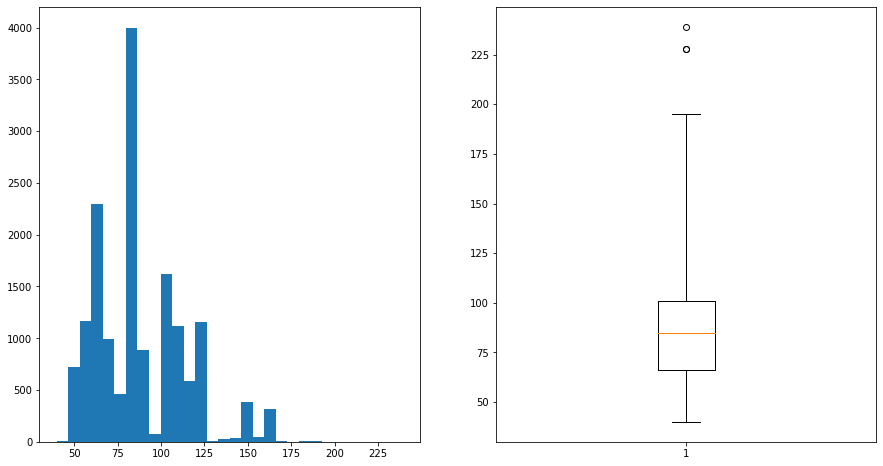

In [153]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(auto["hp(kW)"], bins=30)

plt.subplot(1,2,2)
plt.boxplot(auto["hp(kW)"], whis=3);

#### Displacement(cc)

In [154]:
auto["displacement(cc)"].sort_values().head(55)

12496      1.0
14322      1.0
14321      1.0
14320      1.0
14319      1.0
12778      1.0
12781      1.0
14317      1.0
14316      1.0
12785      1.0
14315      1.0
14323      1.0
12791      1.0
12793      1.0
14310      1.0
12795      1.0
12810      1.0
12818      1.0
12830      1.0
12843      1.0
12844      1.0
14279      1.0
12549      1.0
14314      1.0
12776      1.0
14309      1.0
12479      1.0
12494      1.0
12468      1.0
12462      1.0
12599      1.0
12665      1.0
12745      1.0
13899      1.0
12763      1.0
12764      1.0
14193      2.0
10554      2.0
13907     54.0
10189    122.0
7810     139.0
7809     139.0
7807     139.0
7808     139.0
8126     140.0
15574    160.0
15572    160.0
15571    160.0
15569    160.0
15573    160.0
15570    160.0
13648    890.0
14697    898.0
14698    898.0
14672    898.0
Name: displacement(cc), dtype: float64

In [155]:
auto["displacement(cc)"].sort_values().tail(50)

12464     2000.0
12165     2000.0
11924     2000.0
12555     2000.0
12109     2000.0
11930     2000.0
4187      2000.0
12522     2000.0
12521     2000.0
11027     2000.0
12516     2000.0
12515     2000.0
12489     2000.0
12171     2000.0
12514     2000.0
12174     2000.0
11983     2000.0
11973     2000.0
12176     2000.0
11972     2000.0
12513     2000.0
12467     2000.0
12465     2000.0
12498     2000.0
10459     2000.0
12756     2000.0
15192     2000.0
3591      2480.0
3586      2480.0
3589      2480.0
3592      2480.0
3648      2480.0
3595      2480.0
3647      2480.0
3609      2480.0
3608      2480.0
3607      2480.0
3594      2480.0
3604      2480.0
3605      2480.0
3602      2480.0
3600      2480.0
3599      2480.0
3598      2480.0
3597      2480.0
3603      2480.0
3601      2480.0
10766     2967.0
7167     15898.0
10927    16000.0
Name: displacement(cc), dtype: float64

In [156]:
condition1 = (auto["displacement(cc)"] < 890.0)
auto.loc[condition1 , "displacement(cc)"] = np.nan
condition2 = (auto["displacement(cc)"] > 2967.0)
auto.loc[condition2 , "displacement(cc)"] = np.nan

In [157]:
auto["displacement(cc)"].isnull().sum()

53

In [158]:
fill_w_twocol(auto, "displacement(cc)", "make_model", "register_age")

In [159]:
auto["displacement(cc)"].isnull().sum()

0

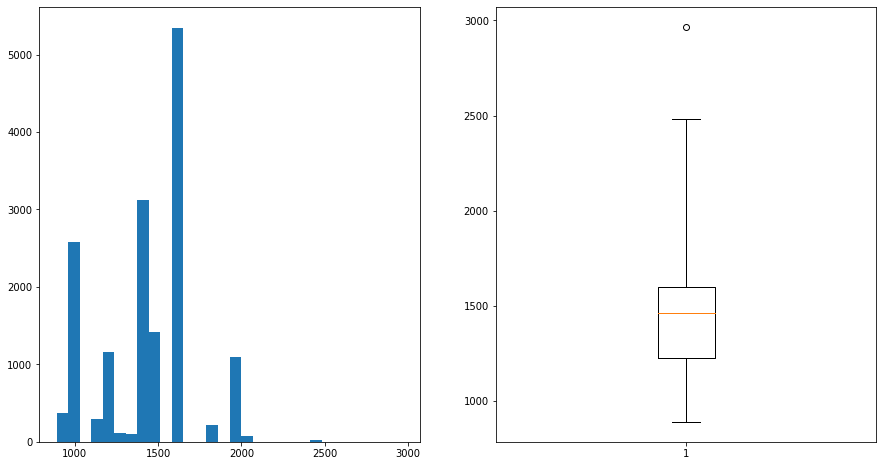

In [160]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(auto["displacement(cc)"], bins=30)

plt.subplot(1,2,2)
plt.boxplot(auto["displacement(cc)"], whis=3);

In [161]:
auto["CO2 Emission(g/km (comb))"].value_counts().sort_index().head(50)

0.0        2
1.0       84
5.0        3
8.0       25
9.0      198
10.0     477
11.0     171
13.0     100
14.0      59
15.0      28
16.0       2
17.0      25
36.0       3
39.0       1
45.0       1
51.0       1
53.0       1
80.0       1
84.0       2
85.0     275
87.0       6
88.0      15
89.0      19
90.0      35
91.0      31
93.0      66
94.0      37
95.0     161
96.0      22
97.0     537
98.0     151
99.0     855
100.0     36
101.0    104
103.0    445
104.0    501
105.0    202
106.0    698
107.0    361
108.0    362
109.0    234
110.0    266
111.0    237
113.0    235
114.0    382
115.0     86
116.0    157
117.0    693
118.0    598
119.0    361
Name: CO2 Emission(g/km (comb)), dtype: int64

#### CO2 Emission

In [162]:
auto["CO2 Emission(g/km (comb))"].value_counts().sort_index().tail(50)

143.0      171
144.0       40
145.0      126
146.0       36
147.0      109
148.0       48
149.0      117
150.0      174
151.0       34
153.0      113
154.0       40
155.0        8
156.0       14
157.0       18
158.0       17
159.0        7
160.0        1
161.0       10
164.0       13
165.0        1
166.0        8
167.0        2
168.0       58
169.0       15
170.0       10
171.0        1
174.0        6
175.0        8
177.0        1
180.0        1
181.0        1
183.0        1
184.0        1
186.0       31
187.0       26
188.0        7
189.0       19
190.0        1
191.0        2
193.0        1
194.0        3
197.0        4
199.0        2
331.0        1
990.0        1
1060.0       1
12087.0      3
12324.0      1
13983.0      1
14457.0      1
Name: CO2 Emission(g/km (comb)), dtype: int64

In [163]:
condition1 = auto["CO2 Emission(g/km (comb))"] > 199.0
auto.loc[condition1, "CO2 Emission(g/km (comb))"] = np.nan
condition2 = auto["CO2 Emission(g/km (comb))"] < 80.0
auto.loc[condition2, "CO2 Emission(g/km (comb))"] = np.nan

In [164]:
auto["CO2 Emission(g/km (comb))"].isnull().sum()

1190

In [165]:
fill_w_twocol(auto, "CO2 Emission(g/km (comb))", "make_model", "Fuel")

In [166]:
auto["CO2 Emission(g/km (comb))"].isnull().sum()

0

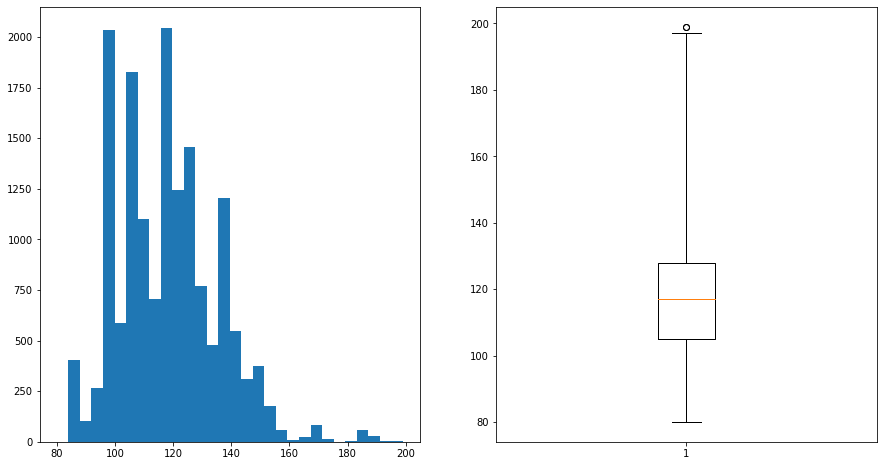

In [167]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(auto["CO2 Emission(g/km (comb))"], bins=30)

plt.subplot(1,2,2)
plt.boxplot(auto["CO2 Emission(g/km (comb))"], whis=3);

#### Consumption(comb)

In [168]:
auto["Consumption(comb)"].sort_values().head(50)

10561    0.0
8215     0.0
14897    1.0
13673    1.2
3611     1.6
3616     1.6
3614     1.6
13489    3.0
13477    3.0
3872     3.0
13942    3.0
6198     3.0
13949    3.0
6202     3.0
13951    3.0
6203     3.0
10955    3.0
8728     3.0
3849     3.0
8759     3.0
13142    3.0
1025     3.0
8819     3.0
13488    3.0
2862     3.0
2861     3.0
5938     3.0
8802     3.0
6134     3.0
13540    3.0
13251    3.0
4361     3.0
13246    3.0
13252    3.0
412      3.0
6171     3.0
8046     3.0
8042     3.0
8037     3.0
8034     3.0
13553    3.0
6401     3.0
6744     3.0
6402     3.0
13506    3.0
13572    3.0
8022     3.0
3185     3.0
8018     3.0
2619     3.0
Name: Consumption(comb), dtype: float64

In [169]:
auto["Consumption(comb)"].sort_values().tail(50)

14904    10.0
14903    10.0
14902    10.0
14901    10.0
14900    10.0
14899    10.0
14898    10.0
14895    10.0
14908    10.0
14894    10.0
14893    10.0
14892    10.0
14891    10.0
14890    10.0
14889    10.0
13889    10.0
2800     10.0
14896    10.0
14909    10.0
14906    10.0
14922    10.0
14911    10.0
14912    10.0
14913    10.0
14914    10.0
14915    10.0
14916    10.0
14917    10.0
14918    10.0
14919    10.0
14920    10.0
14921    10.0
14910    10.0
10508    11.0
535      13.8
14126    32.0
14525    33.0
4555     38.0
4557     38.0
4101     40.0
4088     40.0
500      43.0
15062    46.0
14579    50.0
2237     51.0
2210     51.0
2196     51.0
2194     51.0
13174    54.0
11949    55.0
Name: Consumption(comb), dtype: float64

In [170]:
condition1 = auto["Consumption(comb)"] > 10.0 
auto.loc[condition1, "Consumption(comb)"] = np.nan
condition2 = auto["Consumption(comb)"] < 3.0
auto.loc[condition2, "Consumption(comb)"] = np.nan

In [171]:
auto["Consumption(comb)"].isnull().sum()

24

In [172]:
fill_w_twocol(auto, "Consumption(comb)", "make_model", "displacement(cc)")

In [173]:
auto["Consumption(comb)"].isnull().sum()

0

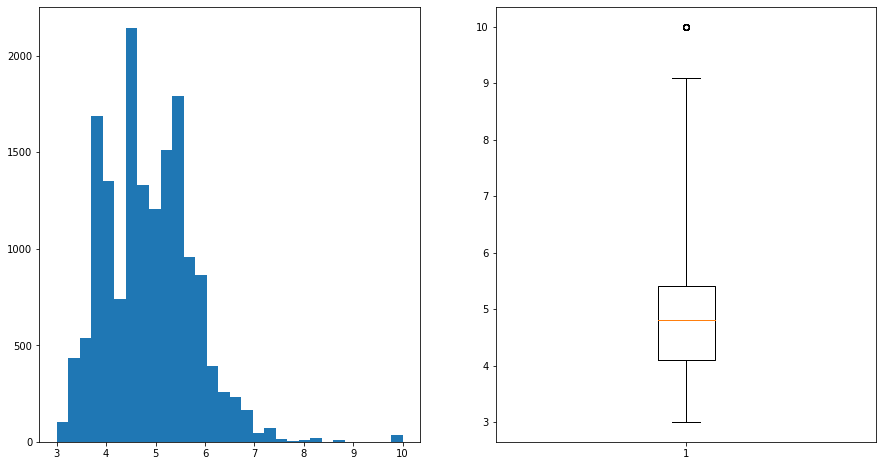

In [174]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(auto["Consumption(comb)"], bins=30)

plt.subplot(1,2,2)
plt.boxplot(auto["Consumption(comb)"], whis=3);

In [175]:
len(auto[auto["Consumption(comb)"] > 9.0])

37

In [176]:
condition = auto["Consumption(comb)"] > 9.0
auto.loc[condition, "Consumption(comb)"] = np.nan

In [177]:
auto["Consumption(comb)"].isnull().sum()

37

In [178]:
fill_w_onecol(auto, "Consumption(comb)", "make_model")

In [179]:
auto["Consumption(comb)"].isnull().sum()

0

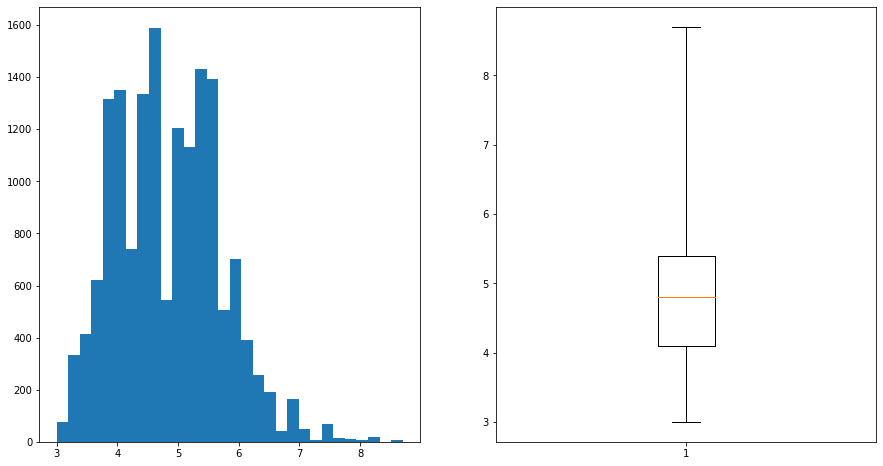

In [180]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(auto["Consumption(comb)"], bins=30)

plt.subplot(1,2,2)
plt.boxplot(auto["Consumption(comb)"], whis=3);

In [181]:
auto.describe()

,price,km,Previous Owners,Inspection new,Nr. of Doors,Nr. of Seats,Cylinders,Emission Label,Gears,hp(kW),displacement(cc),CO2 Emission(g/km (comb)),Consumption(comb),register_age
count,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000
mean,18023.741171,33330.309979,1.045055,0.247078,4.660802,4.975305,3.803004,3.928428,5.844351,88.236835,1426.436660,118.035692,4.837052,2.493339
std,7381.470484,36639.470955,0.335455,0.431326,0.641228,0.413686,0.401203,0.459610,0.706616,25.669832,276.142431,17.352330,0.861177,1.071497
min,4950.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,1.000000,5.000000,40.000000,890.000000,80.000000,3.000000,1.000000
25%,12850.000000,5700.000000,1.000000,0.000000,4.000000,5.000000,4.000000,4.000000,5.000000,66.000000,1229.000000,105.000000,4.100000,2.000000
50%,16900.000000,21000.000000,1.000000,0.000000,5.000000,5.000000,4.000000,4.000000,6.000000,85.000000,1461.000000,117.000000,4.800000,2.000000
75%,21900.000000,48588.250000,1.000000,0.000000,5.000000,5.000000,4.000000,4.000000,6.000000,101.000000,1598.000000,128.000000,5.400000,3.000000
max,74600.000000,317000.000000,4.000000,1.000000,5.000000,7.000000,5.000000,5.000000,8.000000,239.000000,2967.000000,199.000000,8.700000,4.000000


### Heatmap of the Numeric Columns

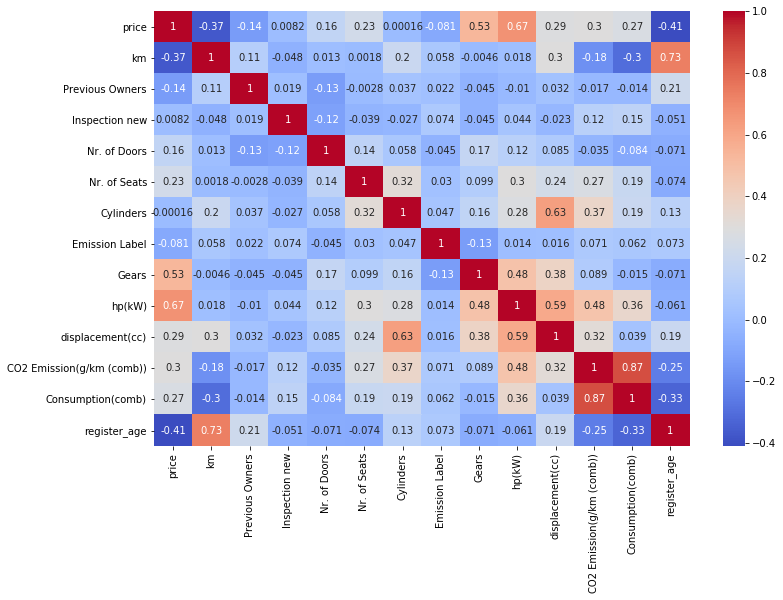

In [182]:
plt.figure(figsize=(12,8))
sns.heatmap(auto.corr(), annot=True, cmap="coolwarm")

#### Price column is the most important column in our dataset. Heatmap displays almost none correlation between Price column with Cylinders, Emission Label and Inspection New columns. Because of that they are removed.

In [183]:
auto.drop(["Cylinders", "Inspection new", "Emission Label"], axis=1, inplace=True)

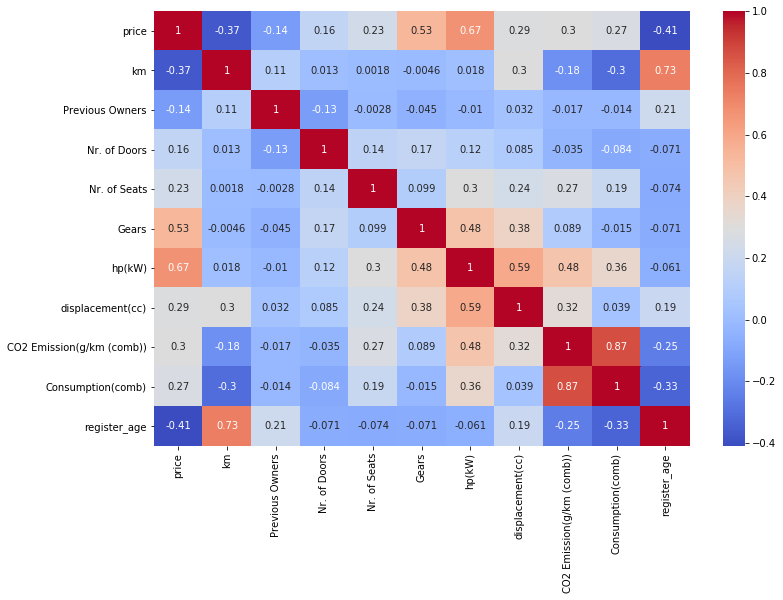

In [184]:
plt.figure(figsize=(12,8))
sns.heatmap(auto.corr(), annot=True, cmap="coolwarm")

In [185]:
auto.head(3)

,make_model,body_type,price,vat,km,Previous Owners,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,Emission Class,Gears,hp(kW),condition_type,displacement(cc),CO2 Emission(g/km (comb)),Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Consumption(comb),register_age
0,Audi A1,Sedans,15770,VAT deductible,56013.0,2.0,Black,Metallic,Cloth,5.0,5.0,Automatic,front,Diesel,Euro 6,5.0,66.0,Used,1422.0,99.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.8,4.0
1,Audi A1,Sedans,14500,Price negotiable,80000.0,2.0,Red,Metallic,Cloth,3.0,4.0,Automatic,front,Gasoline,Euro 6,7.0,141.0,Used,1798.0,129.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",5.6,3.0
2,Audi A1,Sedans,14640,VAT deductible,83450.0,1.0,Black,Metallic,Cloth,4.0,4.0,Automatic,front,Diesel,Euro 6,5.0,85.0,Used,1598.0,99.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.8,4.0


#### Comfort & Convenience, Entertainment & Media, Entertainment & Media, Extras, Safety & Security columns rows are consist of unique values. We have to get every unique value by "get_dummies" function and turn them into numeric values.

In [186]:
auto["Comfort & Convenience"].str.get_dummies(sep=",")

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15909,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15910,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15911,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15912,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [187]:
auto = auto.join(auto["Comfort & Convenience"].str.get_dummies(sep=","))

In [188]:
auto["Entertainment & Media"].str.get_dummies(sep=",")

,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB
0,1,0,0,1,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,0,0
2,0,0,0,0,1,1,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15909,1,0,1,1,0,1,1,0,0,1
15910,1,0,1,1,0,0,1,0,0,1
15911,1,0,0,1,0,1,1,0,0,0
15912,1,0,1,0,0,0,1,0,0,1


In [189]:
auto = auto.join(auto["Entertainment & Media"].str.get_dummies(sep=","))

In [190]:
auto["Extras"].str.get_dummies(sep=",")

,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15909,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15910,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15911,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15912,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [191]:
auto = auto.join(auto["Extras"].str.get_dummies(sep=","))

In [192]:
auto["Safety & Security"].str.get_dummies(sep=",")

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15909,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15910,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15911,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15912,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


In [193]:
auto = auto.join(auto["Safety & Security"].str.get_dummies(sep=","))

#### Now we have to drop columns that we used "str.get_dummies()".

In [194]:
auto.drop(["Comfort & Convenience", "Entertainment & Media", "Extras", "Safety & Security"], axis=1, inplace=True)

#### As a last step, we have to convert all categorical data into numeric data. We use "pd.get_dummies" function for this.

In [195]:
auto = pd.get_dummies(auto)

In [196]:
auto.head(3)

,price,km,Previous Owners,Nr. of Doors,Nr. of Seats,Gears,hp(kW),displacement(cc),CO2 Emission(g/km (comb)),Consumption(comb),register_age,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Body Color_Beige,Body Color_Black,Body Color_Blue,Body Color_Bronze,Body Color_Brown,Body Color_Green,Body Color_Grey,Body Color_Orange,Body Color_Red,Body Color_Silver,Body Color_Violet,Body Color_White,Body Color_Yellow,Paint Type_Metallic,Paint Type_Perl effect,Paint Type_Uni/basic,Upholstery_Cloth,Upholstery_Part/Full Leather,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic,Drive chain_4WD,Drive chain_front,Drive chain_rear,Fuel_Diesel,Fuel_Gasoline,Fuel_LPG/CNG,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6,condition_type_Demonstration,condition_type_Employee's car,condition_type_New,condition_type_Pre-registered,condition_type_Used
0,15770,56013.0,2.0,5.0,5.0,5.0,66.0,1422.0,99.0,3.8,4.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1,14500,80000.0,2.0,3.0,4.0,7.0,141.0,1798.0,129.0,5.6,3.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,14640,83450.0,1.0,4.0,4.0,5.0,85.0,1598.0,99.0,3.8,4.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1


In [197]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15914 entries, 0 to 15913
Columns: 158 entries, price to condition_type_Used
dtypes: float64(10), int64(95), uint8(53)
memory usage: 14.3 MB


In [198]:
auto.isnull().sum()

price                            0
km                               0
Previous Owners                  0
Nr. of Doors                     0
Nr. of Seats                     0
                                ..
condition_type_Demonstration     0
condition_type_Employee's car    0
condition_type_New               0
condition_type_Pre-registered    0
condition_type_Used              0
Length: 158, dtype: int64

In [199]:
auto.to_csv("finaleda.csv", index=False)